  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

/tmp/ipython-input-4118599698.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Type', y='TotalSales', data=sales_by_outlet, palette='Blues_d')


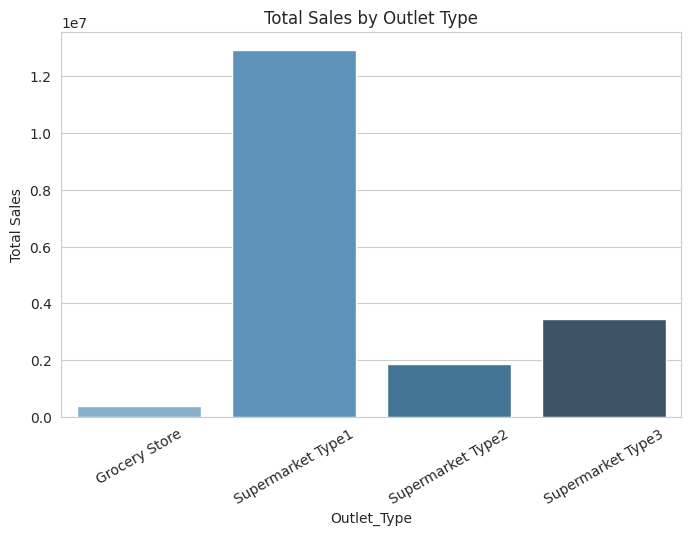

/tmp/ipython-input-4118599698.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Location_Type', y='TotalSales', data=sales_by_location, palette='Greens_d')


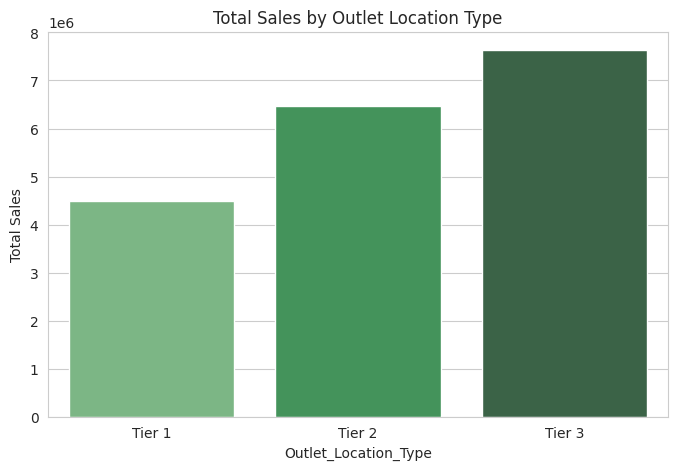

/tmp/ipython-input-4118599698.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Item_Type', x='TotalSales', data=top_products, palette='Oranges_d')


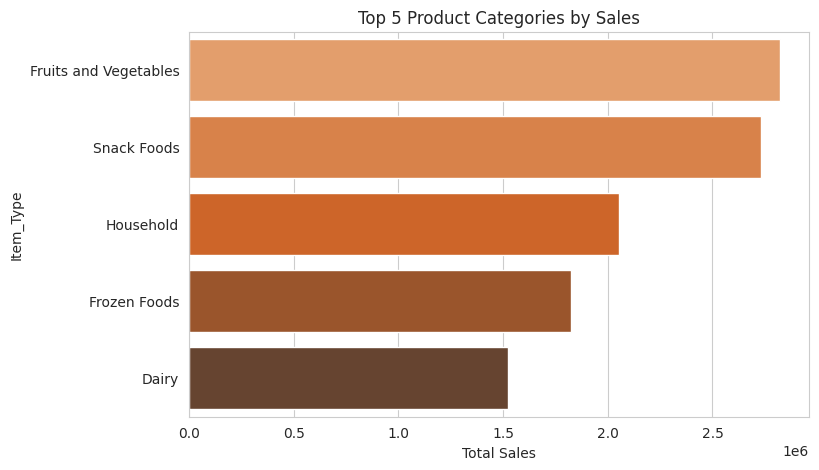

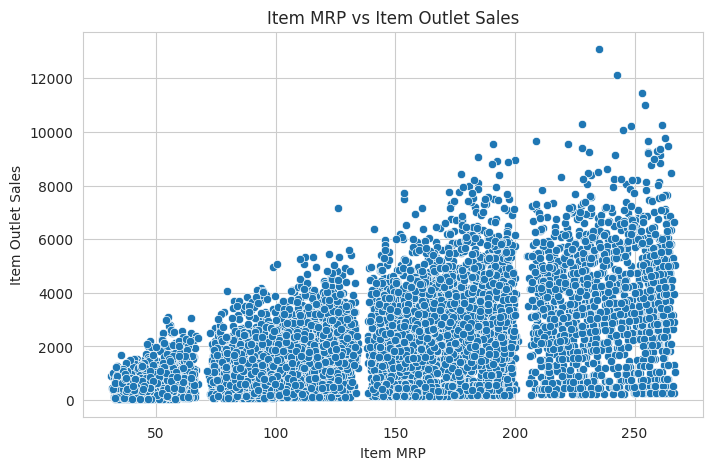

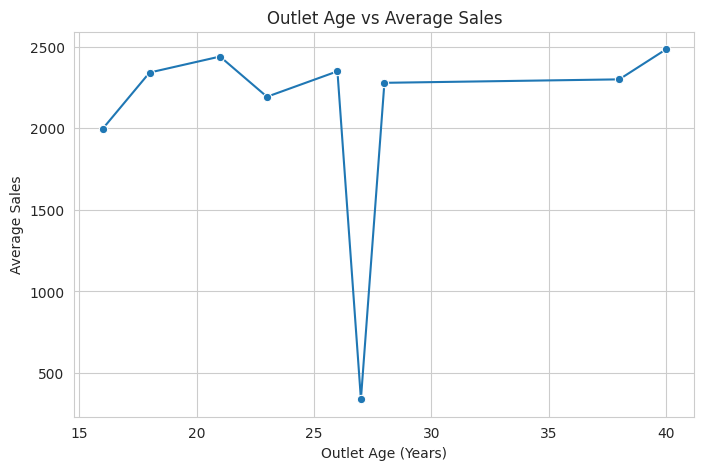

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Train.csv')

print(df.head())


#Create SQLite in-memory database
conn = sqlite3.connect(':memory:')
df.to_sql('Sales', conn, index=False, if_exists='replace')


#Total sales by Outlet Type
query1 = """
SELECT Outlet_Type, SUM(Item_Outlet_Sales) AS TotalSales
FROM Sales
GROUP BY Outlet_Type
"""
sales_by_outlet = pd.read_sql(query1, conn)
print(sales_by_outlet)

#Total sales by Outlet Location Type
query2 = """
SELECT Outlet_Location_Type, SUM(Item_Outlet_Sales) AS TotalSales
FROM Sales
GROUP BY Outlet_Location_Type
"""
sales_by_location = pd.read_sql(query2, conn)
print(sales_by_location)

#Top 5 Product Categories by Sales
query3 = """
SELECT Item_Type, SUM(Item_Outlet_Sales) AS TotalSales
FROM Sales
GROUP BY Item_Type
ORDER BY TotalSales DESC
LIMIT 5
"""
top_products = pd.read_sql(query3, conn)
print(top_products)

#Correlation: Item MRP vs Item Outlet Sales
query4 = "SELECT Item_MRP, Item_Outlet_Sales FROM Sales"
mrp_sales = pd.read_sql(query4, conn)

#Outlet Age Analysis
query5 = """
SELECT (2025 - Outlet_Establishment_Year) AS Outlet_Age, AVG(Item_Outlet_Sales) AS AvgSales
FROM Sales
GROUP BY Outlet_Age
ORDER BY Outlet_Age
"""
outlet_age_sales = pd.read_sql(query5, conn)
print(outlet_age_sales)


sns.set_style('whitegrid')

#Sales by Outlet Type
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Type', y='TotalSales', data=sales_by_outlet, palette='Blues_d')
plt.title('Total Sales by Outlet Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=30)
plt.show()

#Sales by Outlet Location Type
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type', y='TotalSales', data=sales_by_location, palette='Greens_d')
plt.title('Total Sales by Outlet Location Type')
plt.ylabel('Total Sales')
plt.show()

#Top 5 Product Categories
plt.figure(figsize=(8,5))
sns.barplot(y='Item_Type', x='TotalSales', data=top_products, palette='Oranges_d')
plt.title('Top 5 Product Categories by Sales')
plt.xlabel('Total Sales')
plt.show()

#Item MRP vs Item Outlet Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=mrp_sales)
plt.title('Item MRP vs Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

#Outlet Age vs Average Sales
plt.figure(figsize=(8,5))
sns.lineplot(x='Outlet_Age', y='AvgSales', data=outlet_age_sales, marker='o')
plt.title('Outlet Age vs Average Sales')
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Average Sales')
plt.show()
